In [11]:
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense,Dropout
import numpy as np

from sklearn.metrics import classification_report

# Final Neural Network with Tuned Hyperparameters

In [7]:
# Create a feedforward neural net
model = Sequential()

model.add(Flatten(input_shape=(3072,)))
# Create the layers, architecture 1, sigmoid activation, and glorot initalization
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.35)) #hidden layer 2
model.add(Dense(256, activation = 'sigmoid'))
model.add(Dropout(0.35))
model.add(Dense(10, activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.5), metrics = ['accuracy'])

# print a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1573376   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
No

Epoch 1/1000
1125/1125 [==============================] - 6s 5ms/step - loss: 1.3504 - accuracy: 0.5155 - val_loss: 1.3776 - val_accuracy: 0.5073
Epoch 2/1000
1125/1125 [==============================] - 6s 5ms/step - loss: 1.3402 - accuracy: 0.5160 - val_loss: 1.3977 - val_accuracy: 0.5051
Epoch 3/1000
1125/1125 [==============================] - 6s 5ms/step - loss: 1.3367 - accuracy: 0.5204 - val_loss: 1.4089 - val_accuracy: 0.4963
Epoch 4/1000
1125/1125 [==============================] - 6s 5ms/step - loss: 1.3305 - accuracy: 0.5208 - val_loss: 1.3715 - val_accuracy: 0.5123
Epoch 5/1000
1125/1125 [==============================] - 6s 5ms/step - loss: 1.3272 - accuracy: 0.5224 - val_loss: 1.4005 - val_accuracy: 0.5055
Epoch 6/1000
1125/1125 [==============================] - 6s 5ms/step - loss: 1.3200 - accuracy: 0.5239 - val_loss: 1.3809 - val_accuracy: 0.5028
Epoch 7/1000
1125/1125 [==============================] - 6s 5ms/step - loss: 1.3200 - accuracy: 0.5269 - val_loss: 1.4320 -

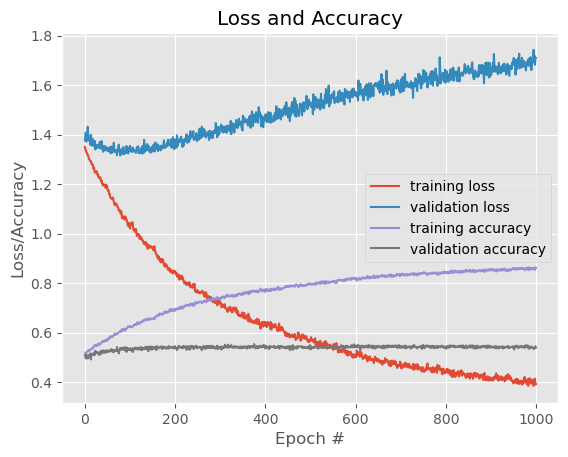

In [10]:
#read in cifar10 data
(trainX, trainY), (testX, testY) = cifar10.load_data()

X = np.concatenate((trainX,testX))
y = np.concatenate((trainY,testY))

train_val_X, testX, train_val_Y, testY = train_test_split(X, y, train_size=0.8, random_state=1)
trainX, valX, trainY, valY = train_test_split(train_val_X, train_val_Y, train_size=0.75, random_state=1)

# reshape into vectors
trainX = trainX.reshape((trainX.shape[0], 32 * 32 * 3))
valX = valX.reshape((valX.shape[0], 32 * 32 * 3))
testX = testX.reshape((testX.shape[0], 32 * 32 * 3))

# scale the data to [0,1]
trainX = trainX/255.0
valX = valX/255.0
testX = testX/255.0

# convert the labels to one-hot form
trainY = to_categorical(trainY)
valY = to_categorical(valY)
testY = to_categorical(testY)

# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

# Conclusion

The data utilized for this study was the CIFAR10 dataset.  The purpose of this study was to understand the possible hyperparameters and their affect on test accuracy.  To complete this study, I split the data 60/20/20 into training, validation and test data, and ran the model with 1,000 epochs.

* My beginning parameters were 2 hidden layers with 256 and 128 neurons respectively and one final output layer of 10 neurons that predicts the class from the CIFAR10 dataset. It used the sigmoid activation function with glorot_uniform initializer and no regularizers. The neural network also defaulted an input_size of 3072 to fit the CIFAR10 data and a used loss function of mean_squared_errors. The initial accuracy with very low, at around 3%

* My next attempt was to change the loss function to crossEntropy, which improved the accuracy to approximately 45%. 

* I also tested with other activation functions such as tanh and relu but both of those resulted in lower accuaries of around 10%, so I chose to keep the sigmoid activation. 

* My next attempt to improve accuracy was to use other initializers such as he_normal and glorot_normal. Again, I found lower accuracy results, so I kept glorot_unifor as my initializer. 

* While I was testing the model with small epoch numbers, I noticed that the model began overfitting when it reached a certain epoch number; however, when I tried l1, l2, and l1_l2 regularization techniques, all three of the accuracies were around 9-10% accuracy. Even though it reduced overfitting of the model, it did not help to achieve the assignment goal to achieve the highest accuracy. 

* I also attempted to change the number of neurons from 256,128,10 to increase the number, and I attempted the addition of another hidden layer. I found that increasing the number of neurons to 512 and 256 improved the accuracy. 

* I also utilized a different normalization technique instead of dividng the values by 255, and used the normalization formula from statistics, (x - mu) / sigma. However, this again resulted in a lower accuracy, so I retained my other hyperparameters. 

* Based on my attempts thus far, I realized that the accuracy would get stuck at around 43% for the validation dataset even though the training accuracy kept increasing. I then realized that I needed to lower my batch size from 128 to 32. This helped a little, but validation accuracy still got stuck at 46%. 

* As a final step, I decided to implement Dropout as a regularization method since the l1 and l2 did not seem to work very well. Once I used dropout after each hidden layer, I received a much better result which brought my accuracy up to around 54%.

I attempted a number of different hyperparameter tunings, including activation functions (tanh and relu), regularization techniques (l1, l2, l1_l2), number of neurons (128, 256, 512), normalization techniques (statistical vs. constant 255), and architectures (fully connected network with multilayer perceptrons, dropout as a regularization method).  I found that regularization provided the best results.